# Superficies Fractais

A idéia é plotar explorações de calculos considerando o dominio dos numeros complexos (ou um trecho dele) como imagens.

O conceito é similar ao que origina o conjunto de Manldelbrot, mas meu interesse é explorar calculos mais diretos (em vez dos iterativos que geram o conjunto de Mandelbrot).

A idéia é ver se é possivel gerar padrões que sejam funções diretas do espaço em si (do plano complexo) e talvez conseguir manipular os calculos para gerar qualquer padrao que se queira.

Como exemplo, em vez de pensar em numeros complexos, utilizando o plano x,y como exemplo, se uma funcao fosse definida como f(x,y) = x % 2 + y % 2 > 0 teriamos um quadriculado de 1 pixel se mapeassemos 1px por numero inteiro em x e y e mapeassemos true = branco e false = preto.

Pode-se manipular essa funcao para gerar um quadriculado de qualquer tamanho e até mesmo retangulos em vez de quadrados:

f(x,y) = ((x % w) / w ) % 2 == 1 or ((y % h) / h ) % 2 == 1

Entao a ideia é explorar o plano complexo de forma similar para ver se é possivel gerar padroes mais sofisticados do que um quadriculado.

O exemplo mais simples seria replicar a ideia do par/impar com o plano complexo:

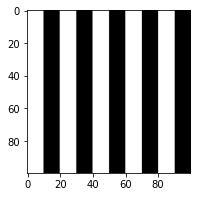

In [85]:
import matplotlib.pyplot as plt
import numpy as np

def gen_field( size ):
    x = np.linspace( 0+0j, complex( size - 1, 0), size )
    y = np.linspace( 0+0j, complex( 0, size - 1), size )

    x, y = np.meshgrid( x, y )
    field = x + y
    return field

field = gen_field( 100 )

def mod_( cpx, val ):
    return int(( cpx.real / val )) % 2

vec_mod_ = np.vectorize( mod_ )

img = vec_mod_( field, 10 )
plt.figure( figsize=( 3, 3 ))
imgplot = plt.imshow( img,cmap="Greys" )


É facil gerar padrões dessa forma repetitiva, como um gradiente:

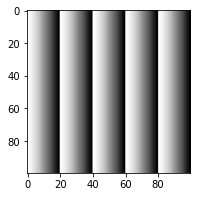

In [86]:
def mod_( cpx, val ):
    return ( cpx.real / val ) % 2

vec_mod_ = np.vectorize( mod_ )

field = gen_field( 100 )

img = vec_mod_( field, 10 )
plt.figure( figsize=( 3, 3 ))
imgplot = plt.imshow( img,cmap="Greys" )


Mas o objetivo é conseguir coisas como (que consegui por acidente e prova q o conceito é pelo menos concebivel, e fractal):

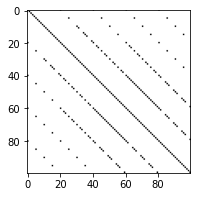

In [91]:
def mod_( cpx, val ):
    return 0 if ( cpx.real / val ) % 2 != ( cpx.imag / val ) % 2 else 1.

vec_mod_ = np.vectorize( mod_ )

field = gen_field( 100 )

img = vec_mod_( field, 10 )
plt.figure( figsize=( 3, 3 ))
imgplot = plt.imshow( img,cmap="Greys" )

## Resultados acidentais

### Degrade exponencial

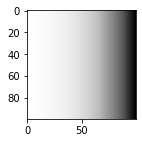

In [93]:
import math

field = gen_field( 100 )

def cossin( cpx, strength ):
    return math.exp( cpx.real / strength ) 

vec_cossin = np.vectorize( cossin )

img = vec_cossin( field, 40. )
plt.figure( figsize=( 2, 2 ))
imgplot = plt.imshow( img,cmap="Greys" )

### Sofá

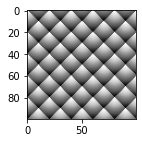

In [112]:
from math import floor

field = gen_field( 100 )

def mag_modj( a, b ):
    x = a/b
    x = floor( x.real ) + ( floor( x.imag )*1j )
    z = x*b
    return np.abs( a-z )

vec_mag_modj = np.vectorize( mag_modj )

img = vec_mag_modj( field, 10+10j )
plt.figure( figsize=( 2, 2 ))
imgplot = plt.imshow( img,cmap="Greys" )

### Degradê conico

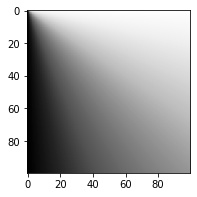

In [120]:
from math import floor

field = gen_field( 100 )

def cone( cpx, ang ):
    return math.atan2( cpx.imag / 100., cpx.real / 100 )

vec_cone = np.vectorize( cone )

img = vec_cone( field, 30 )
plt.figure( figsize=( 3, 3 ))
imgplot = plt.imshow( img,cmap="Greys" )

### Degrade circular

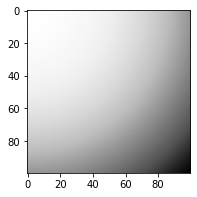

In [151]:
from math import floor

field = gen_field( 100 )

def brot( cpx ):
    return np.abs( cpx*cpx + cpx )

vec_brot = np.vectorize( brot )

img = vec_brot( field )
plt.figure( figsize=( 3, 3 ))
imgplot = plt.imshow( img,cmap="Greys" )

### Azulejo? Toalha?

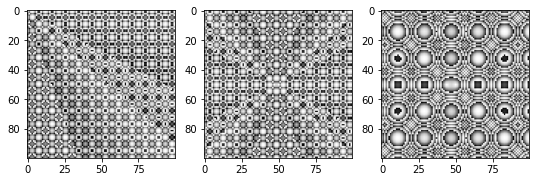

In [173]:
from math import floor

field = gen_field( 100 )

def brot( cpx, dif, div ):
    v = ( cpx - dif ) / div 
    res = np.abs( v * v + v )
    return res.real % 1 #( res.real % 1, res.imag % 1, 0 )

vec_brot = np.vectorize( brot )

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,9))
img = np.array( vec_brot( field, 0, 3. )) #.reshape( 100, 100, 3 )

imgplot = ax1.imshow( img, cmap="Greys" )

img = np.array( vec_brot( field, 50+50j, 3. )) #.reshape( 100, 100, 3 )
imgplot = ax2.imshow( img, cmap="Greys" )

img = np.array( vec_brot( field, 50+50j, 6. )) #.reshape( 100, 100, 3 )
imgplot = plt.imshow( img, cmap="Greys" )

Tentativa atual:

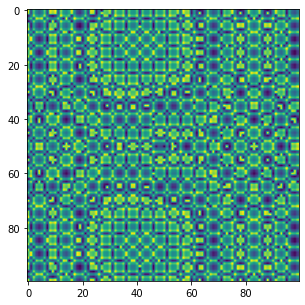

In [181]:
from math import floor

field = gen_field( 100 )

def brot( cpx, dif, div ):
    v = ( cpx - dif ) / div 
    res = np.abs( v * v + v )
    return res.real % 1 #( res.real % 1, res.imag % 1, 0 )

vec_brot = np.vectorize( brot )

img = np.array( vec_brot( field, 50+50j, math.pi )) #.reshape( 100, 100, 3 )
plt.figure( figsize=( 5, 5 ))
imgplot = plt.imshow( img ) #, cmap="Greys" )